#  Gruppuppgift Machine Learning
- Machine Learning - Kunskapskontroll 1

## Läser in data till Kunskapskontroll 1

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

Data_path = "car_price_dataset.csv"

df_carprices_orig = pd.read_csv(Data_path, sep=';', encoding='cp1252')       # Hittade att det blev en kolumn, separerar csv-filens data med ;
df_carprices = df_carprices_orig.copy()                                 # Sparar en kopia av originaldataframen
    

### Dataset overview

In [2]:
df_carprices.info()     # Information om datatyper och icke-null värden i varje kolumn
# Inga nullvärden
# 10 000 rader
# 10 koumner
# test

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         10000 non-null  object 
 1   Model         10000 non-null  object 
 2   Year          10000 non-null  int64  
 3   Engine_Size   10000 non-null  float64
 4   Fuel_Type     10000 non-null  object 
 5   Transmission  10000 non-null  object 
 6   Mileage       10000 non-null  int64  
 7   Doors         10000 non-null  int64  
 8   Owner_Count   10000 non-null  int64  
 9   Price         10000 non-null  int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 781.4+ KB


In [3]:
df_carprices.head(10)    # 10 första raderna i min dataframe med data från car_price_dataset.csv för att utforska datan

# Kategoriska kolumner: Brand, Model, Fuel_Type, Transmission
# Numeriska kolumner: Year, Mileage, Doors, Owner_Count, Engine_Size

,Brand,Model,Year,Engine_Size,Fuel_Type,Transmission,Mileage,Doors,Owner_Count,Price
0,Kia,Rio,2020,4.2,Diesel,Manual,289944,3,5,8501
1,Chevrolet,Malibu,2012,2.0,Hybrid,Automatic,5356,2,3,12092
2,Mercedes,GLA,2020,4.2,Diesel,Automatic,231440,4,2,11171
3,Audi,Q5,2023,2.0,Electric,Manual,160971,2,1,11780
4,Volkswagen,Golf,2003,2.6,Hybrid,Semi-Automatic,286618,3,3,2867
5,Toyota,Camry,2007,2.7,Petrol,Automatic,157889,4,4,7242
6,Honda,Civic,2010,3.4,Electric,Automatic,139584,3,1,11208
7,Kia,Sportage,2001,4.7,Electric,Semi-Automatic,157495,2,2,7950
8,Kia,Sportage,2014,2.6,Hybrid,Manual,98700,3,4,9926
9,Toyota,RAV4,2005,3.1,Petrol,Manual,107724,2,5,6545


In [4]:
df_carprices.describe() # Statistisk sammanfattning av numeriska kolumner

# Möjliga Outliers: Mileage: min 25 och max 299 947, mean 149 239
# Diskreta variabler med få nivåer: Doors, Owner_Count
# Kategoriska variabler med många nivåer: Brand, Model
# Beroende variabel: Price
# Oberoende variabler: Year, Mileage, Doors, Owner_Count, Engine_Size, Brand, Model, Fuel_Type, Transmission

,Year,Engine_Size,Mileage,Doors,Owner_Count,Price
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,2011.543700,3.000560,149239.111800,3.497100,2.991100,8852.96440
std,6.897699,1.149324,86322.348957,1.110097,1.422682,3112.59681
min,2000.000000,1.000000,25.000000,2.000000,1.000000,2000.00000
25%,2006.000000,2.000000,74649.250000,3.000000,2.000000,6646.00000
50%,2012.000000,3.000000,149587.000000,3.000000,3.000000,8858.50000
75%,2017.000000,4.000000,223577.500000,4.000000,4.000000,11086.50000
max,2023.000000,5.000000,299947.000000,5.000000,5.000000,18301.00000


In [5]:
X = df_carprices.drop(columns=["Price"])        # Sätter alla kolumner utom målvariabeln Price i X
y = df_carprices["Price"]                       # Sätter kolumnen Price i målvariabeln y (target)

### Uppdelning av data i träningsdata och testdata

In [6]:
from sklearn.model_selection import train_test_split

X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=36)                 # delar upp data i 80% träning/validering och 20% test
X_train, X_val, y_train, y_val  = train_test_split(X_train_full, y_train_full, test_size=0.25, random_state=36)     # delar upp träingsdata i 75% träning (0.75 * 0.80 = 0.60 = 60% av hela datasetet) och 25% validering (0.25 * 0.80 = 0.20 = 20% av hela datasetet)

print("Train:", X_train.shape, y_train.shape)
print("Val:  ", X_val.shape, y_val.shape)
print("Test: ", X_test.shape, y_test.shape)

Train: (6000, 9) (6000,)
Val:   (2000, 9) (2000,)
Test:  (2000, 9) (2000,)


### Preprocessing av data

#### Förvandlar till numeriska kolumner

In [7]:
from sklearn.compose import ColumnTransformer                   
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Delar upp kolumner i kategoriska och numeriska
categorical_cols = ["Brand", "Model", "Fuel_Type", "Transmission"]              # Delar upp kolumnerna i icke siffor              
numeric_cols = [c for c in X_train.columns if c not in categorical_cols]        # Och kolumner med siffror

# Skapar en ColumnTransformer, en för linear modeller - väljer att kommentera bort denna för att använda den skalade versionen nedan
#ct_linear = ColumnTransformer(transformers=[
#        ("categorical", OneHotEncoder(handle_unknown="ignore", drop="first"), categorical_cols),        # För Categorical/kategori (text): gör om till siffror med One-Hot (0/1-kolumner) drop="first" för att undvika dummy-variabel-fälla, fungerar både till linear och tree modeller
#        ("numeric", "passthrough", numeric_cols),])                                                     # För numeriska kolumner: låt dem vara som de är ("passthrough")

# Skapar en ColumnTransformer med skalning för linear modeller
ct_scaled = ColumnTransformer(transformers=[
        ("categorical", OneHotEncoder(handle_unknown="ignore", drop="first"), categorical_cols),        # För Categorical/kategori (text): gör om till siffror med One-Hot (0/1-kolumner) drop="first" för att undvika dummy-variabel-fälla
        ("numeric", StandardScaler(), numeric_cols)])                                                   # För numeriska kolumner: skala med StandardScaler (medelvärde 0, standardavvikelse 1)

# Skapar en ColumnTransformer, en för tree modeller
ct_tree = ColumnTransformer(transformers=[  
        ("categorical", OneHotEncoder(handle_unknown="ignore"), categorical_cols),                      # ColumnTransformer för tree modeller, ingen drop="first" här   
        ("numeric", "passthrough", numeric_cols),])                                                     # För numeriska kolumner: låt dem vara som de är ("passthrough")

### EDA

In [8]:
# Kollar efter dubbletter i träningsdata
# 0 dubbletter
print("Duplicerade rader X_train:", X_train.duplicated().sum())

# Saknade värden (du har inga, men bra att visa)
print("\nMissing values (train):")
print(X_train.isna().sum().sort_values(ascending=False).head(10))

Duplicerade rader X_train: 0

Missing values (train):
Brand           0
Model           0
Year            0
Engine_Size     0
Fuel_Type       0
Transmission    0
Mileage         0
Doors           0
Owner_Count     0
dtype: int64


In [9]:
# Kollar unika värden i kategoriska kolumner
for col in ["Brand", "Model", "Fuel_Type", "Transmission"]:
    print("X_train", col, "unika:", X_train[col].nunique())


X_train Brand unika: 10
X_train Model unika: 30
X_train Fuel_Type unika: 4
X_train Transmission unika: 3


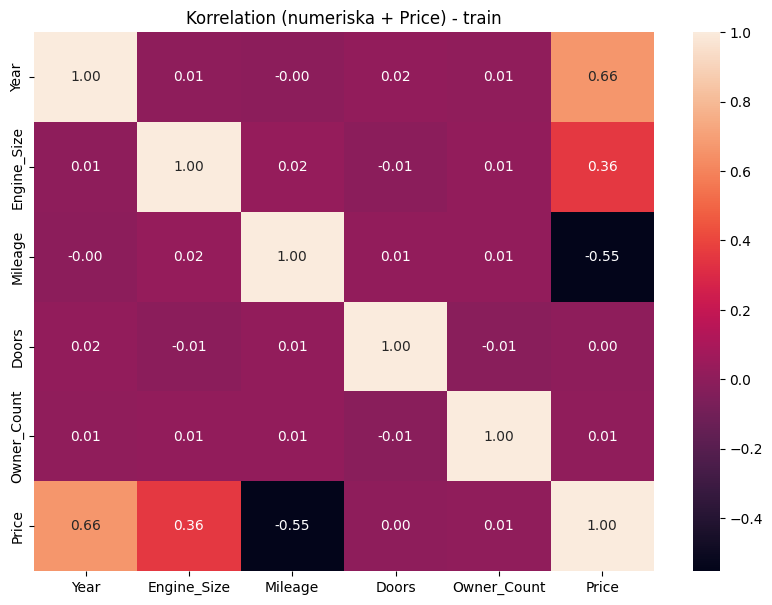

Korrelation med Price:
Price          1.000000
Year           0.663728
Engine_Size    0.357213
Owner_Count    0.007743
Doors          0.000769
Mileage       -0.552335
Name: Price, dtype: float64


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Korrelation mellan numeriska kolumner och Price i träningsdata

# Bygg df med numeriska X + Price
df_corr = X_train[numeric_cols].copy()
df_corr["Price"] = y_train  # behåll index, bättre än .values
corr = df_corr.corr(numeric_only=True)

plt.figure(figsize=(10,7))
sns.heatmap(corr, annot=True, fmt=".2f")
plt.title("Korrelation (numeriska + Price) - train")
plt.show()

print("Korrelation med Price:")
print(corr["Price"].sort_values(ascending=False))

# Korrelations to Price observations:
# Price och Year: positiv korrelation (~0.66) → nyare bilar högre priser
# Price och Mileage: negativ korrelation (~-0.55) → högre körsträcka lägre priser
# Price och Engine_Size: positiv korrelation (~0.36) → större motor högre priser
# Doors och Owner_Count har ~0 korrelation med Price → inget tydligt linjärt samband i train.


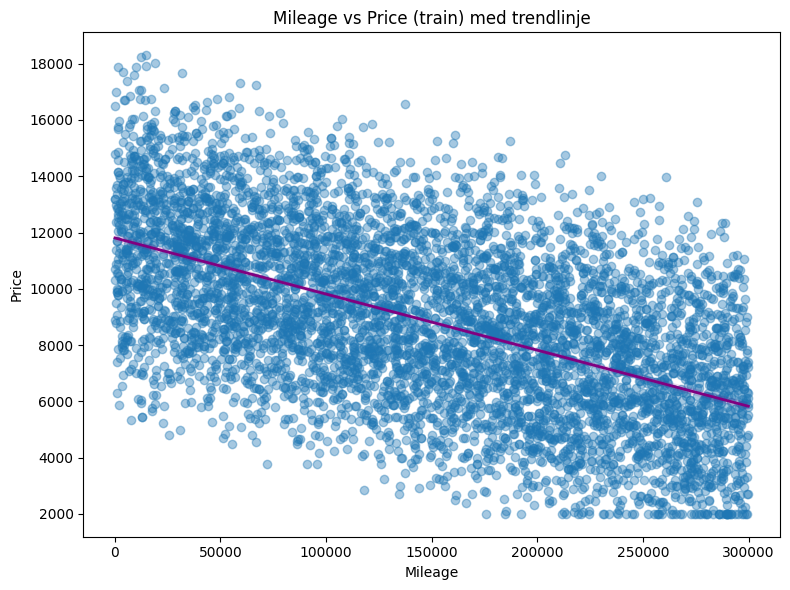

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot för att visualisera sambandet mellan Mileage och Price
plt.figure(figsize=(8,6))
sns.regplot(
    x=X_train["Mileage"],
    y=y_train,
    scatter_kws={"alpha": 0.4},
    line_kws={"color": "purple","linewidth": 2}
)
plt.title("Mileage vs Price (train) med trendlinje")
plt.xlabel("Mileage")
plt.ylabel("Price")
plt.tight_layout()
plt.show()

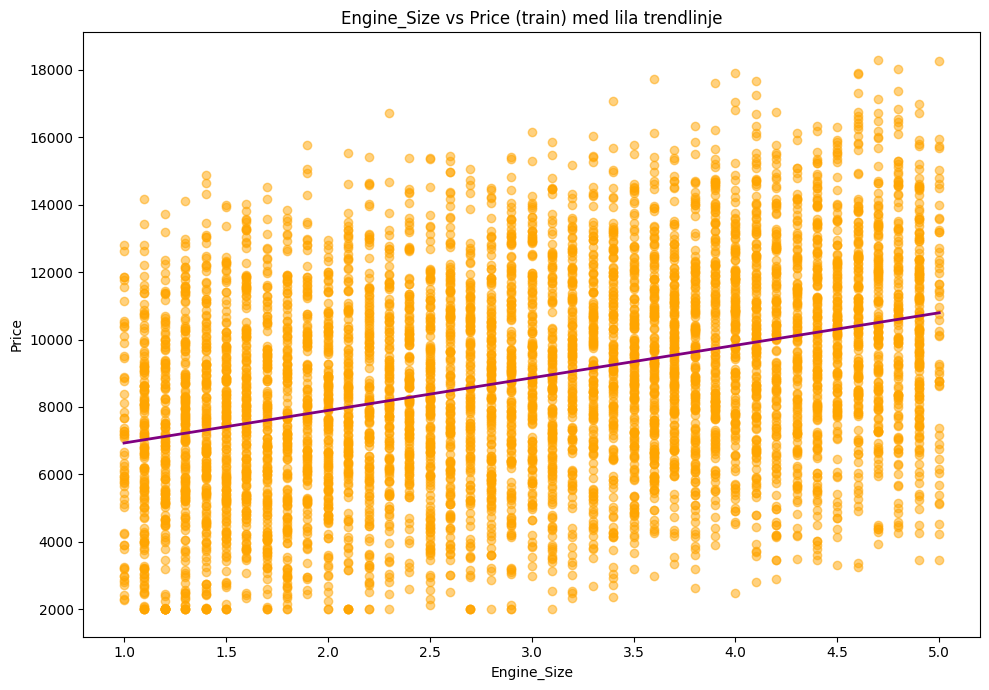

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 7))
sns.regplot(
    x=X_train["Engine_Size"],
    y=y_train,
    scatter_kws={"alpha": 0.5, "color": "orange"},
    line_kws={"color": "purple", "linewidth": 2},
    ci=None  # ta bort konfidensband (valfritt)
)
plt.title("Engine_Size vs Price (train) med lila trendlinje")
plt.xlabel("Engine_Size")
plt.ylabel("Price")
plt.tight_layout()
plt.show()


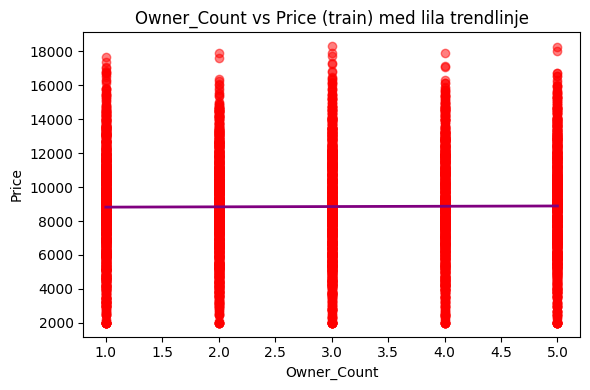

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.regplot(
    x=X_train["Owner_Count"],
    y=y_train,
    scatter_kws={"alpha": 0.5, "color": "red"},
    line_kws={"color": "purple", "linewidth": 2},
    ci=None
)
plt.title("Owner_Count vs Price (train) med lila trendlinje")
plt.xlabel("Owner_Count")
plt.ylabel("Price")
plt.tight_layout()
plt.show()


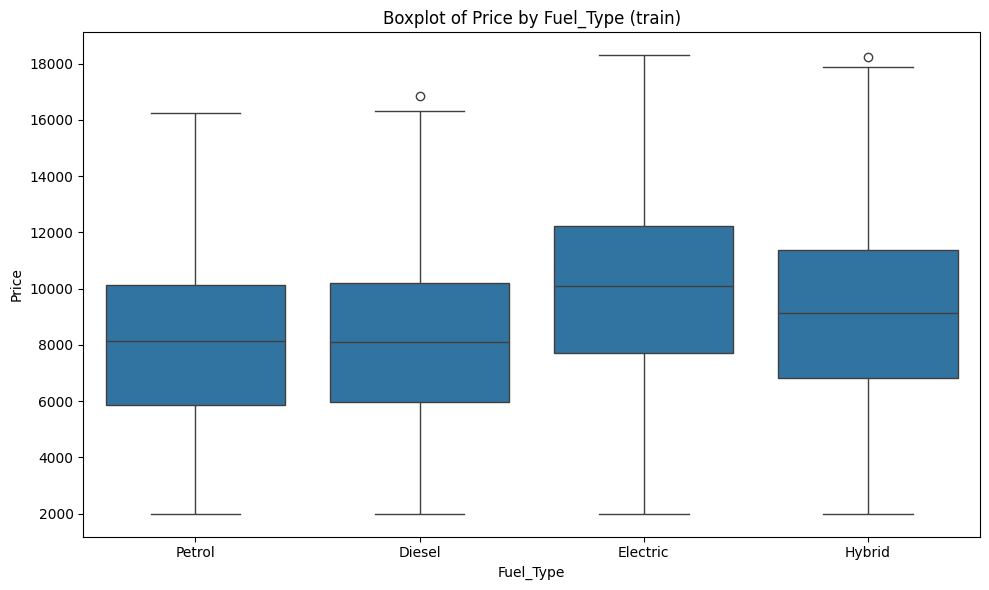

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.boxplot(
    x=X_train["Fuel_Type"],
    y=y_train
)
plt.title("Boxplot of Price by Fuel_Type (train)")
plt.xlabel("Fuel_Type")
plt.ylabel("Price")
plt.tight_layout()
plt.show()


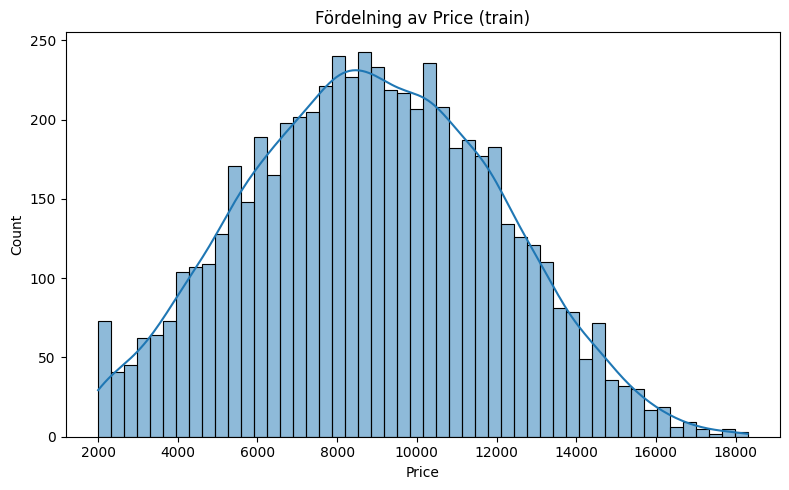

In [15]:
plt.figure(figsize=(8,5))
sns.histplot(y_train, bins=50, kde=True)
plt.title("Fördelning av Price (train)")
plt.tight_layout()
plt.show()


#### Slutsatser från EDA:
1. Price verkar vara högerskev (positivt snedfördelad) med några höga outliers.
2. Year har tydlig positiv korrelation med Price, medan Mileage har tydlig negativ korrelation.
3. Engine_Size visar en svag–måttlig positiv relation till Price.
4. Doors och Owner_Count visar inget tydligt linjärt samband med Price i train.
5. Kategoriska variabler (Brand, Model, Fuel_Type, Transmission) visar prisskillnader mellan grupper.


## Skapa och Testa modeller

### LinearRegresssion (med ct_scaled)
__RMSE train__: 75.13, __RMSE val__:   88.08, __Gap__: 12.949602635167992
__Tid__: 0.04 sekunder

In [16]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error
import time

start = time.perf_counter()

pipe_lin = Pipeline(steps=[
    ("prep", ct_scaled),                 # din ColumnTransformer
    ("model", LinearRegression())        # modellen
])

pipe_lin.fit(X_train, y_train)

rmse_train = root_mean_squared_error(y_train, pipe_lin.predict(X_train))
rmse_val   = root_mean_squared_error(y_val,   pipe_lin.predict(X_val))

print("RMSE train:", rmse_train.__round__(2))
print("RMSE val:  ", rmse_val.__round__(2))
print("Gap:", rmse_val - rmse_train)

stop = time.perf_counter()
elapsed = stop - start
print(f"Tid: {elapsed:.2f} sekunder")

RMSE train: 87.68
RMSE val:   67.5
Gap: -20.175162236706484
Tid: 0.05 sekunder


## Ridge (med ct_scaled)
__Bästa alpha__: 0.001, 
__Bästa CV RMSE__: 73.4046086675257, 
__RMSE train__: 75.13, __RMSE val__:   88.08, __Gap__: 12.95
__Tid__: 6.99 sekunder

In [17]:
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import root_mean_squared_error
import time

start = time.perf_counter()

pipe_ridge = Pipeline(steps=[
    ("prep", ct_scaled),
    ("model", Ridge(random_state=42))
])

param_grid = {
    "model__alpha": [0.001, 0.01, 0.1, 1, 10, 50, 100, 200, 500, 1000]
}

gs = GridSearchCV(
    estimator=pipe_ridge,
    param_grid=param_grid,
    scoring="neg_root_mean_squared_error",
    cv=5,
    n_jobs=-1
)

gs.fit(X_train, y_train)

print("Bästa alpha:", gs.best_params_["model__alpha"])
print("Bästa CV RMSE:", -gs.best_score_)

best_pipe = gs.best_estimator_

rmse_train = root_mean_squared_error(y_train, best_pipe.predict(X_train))
rmse_val   = root_mean_squared_error(y_val,   best_pipe.predict(X_val))

print("RMSE train:", round(rmse_train, 2))
print("RMSE val:  ", round(rmse_val, 2))
print("Gap:", round(rmse_val - rmse_train, 2))

stop = time.perf_counter()
elapsed = stop - start
print(f"Tid: {elapsed:.2f} sekunder")

Bästa alpha: 0.001
Bästa CV RMSE: 86.40584338833257
RMSE train: 87.68
RMSE val:   67.51
Gap: -20.17
Tid: 8.90 sekunder


## Lasso (med ct_scaled)
__Bästa alpha__: 0.1519911082952933, 
__Bästa CV RMSE__: 73.28900132926228
__RMSE train__: 75.21, __RMSE val__:   87.82, __Gap__: 12.61
__Tid__: 0.31 sekunder

In [18]:
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import root_mean_squared_error
import time

start = time.perf_counter()

pipe_lasso = Pipeline(steps=[
    ("prep", ct_scaled),
    ("model", Lasso(max_iter=20000, random_state=42))
])

param_grid = {
    "model__alpha": np.logspace(-4, 1, 12)  # 1e-4 ... 10
}

gs = GridSearchCV(
    estimator=pipe_lasso,
    param_grid=param_grid,
    scoring="neg_root_mean_squared_error",
    cv=5,
    n_jobs=-1
)

gs.fit(X_train, y_train)

print("Bästa alpha:", gs.best_params_["model__alpha"])
print("Bästa CV RMSE:", -gs.best_score_)

best_pipe = gs.best_estimator_

rmse_train = root_mean_squared_error(y_train, best_pipe.predict(X_train))
rmse_val   = root_mean_squared_error(y_val,   best_pipe.predict(X_val))

print("RMSE train:", round(rmse_train, 2))
print("RMSE val:  ", round(rmse_val, 2))
print("Gap:", round(rmse_val - rmse_train, 2))

stop = time.perf_counter()
elapsed = stop - start
print(f"Tid: {elapsed:.2f} sekunder")


Bästa alpha: 0.4328761281083057
Bästa CV RMSE: 86.23935639418508
RMSE train: 87.9
RMSE val:   67.33
Gap: -20.58
Tid: 0.46 sekunder


## ElasticNet (med ct_scaled)
__Bästa params__: {'model__alpha': np.float64(0.21544346900318823), 'model__l1_ratio': 1.0}, 
__Bästa CV RMSE__: 73.27202429297012
__RMSE train__: 75.24, __RMSE val__:   87.78, __Gap__: 12.54
__Tid__: 1.27 sekunder

In [19]:
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import root_mean_squared_error
import time

start = time.perf_counter()

pipe_en = Pipeline(steps=[
    ("prep", ct_scaled),
    ("model", ElasticNet(max_iter=50000, random_state=42))
])

param_grid = {
    "model__alpha": np.logspace(-4, 2, 10),      # 1e-4 ... 1e2
    "model__l1_ratio": [0.1, 0.3, 0.5, 0.7, 0.9, 1.0]
}

gs = GridSearchCV(
    estimator=pipe_en,
    param_grid=param_grid,
    scoring="neg_root_mean_squared_error",
    cv=5,
    n_jobs=-1
)

gs.fit(X_train, y_train)

print("Bästa params:", gs.best_params_)
print("Bästa CV RMSE:", -gs.best_score_)

best_pipe = gs.best_estimator_
rmse_train = root_mean_squared_error(y_train, best_pipe.predict(X_train))
rmse_val   = root_mean_squared_error(y_val,   best_pipe.predict(X_val))

print("RMSE train:", round(rmse_train, 2))
print("RMSE val:  ", round(rmse_val, 2))
print("Gap:", round(rmse_val - rmse_train, 2))

stop = time.perf_counter()
elapsed = stop - start
print(f"Tid: {elapsed:.2f} sekunder")


Bästa params: {'model__alpha': np.float64(0.21544346900318823), 'model__l1_ratio': 1.0}
Bästa CV RMSE: 86.26030679653097
RMSE train: 87.77
RMSE val:   67.3
Gap: -20.47
Tid: 1.97 sekunder


## LinearSVR
__Bästa params__: {'model__C': np.float64(1500.0), 'model__epsilon': 0, 'model__loss': 'squared_epsilon_insensitive'}
__Bästa CV RMSE__: 73.41100973129662
__RMSE train__: 75.13, __RMSE val__:   88.06, __Gap__: 12.93
__Tid__: 39.01 sekunder

In [20]:
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVR
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import root_mean_squared_error
import time

start = time.perf_counter()

pipe_svr = Pipeline(steps=[
    ("prep", ct_scaled),
    ("model", LinearSVR(max_iter=50000, random_state=42))
])

C_values = np.unique(np.r_[np.logspace(-2, 3, 6), [50, 1500]])

param_grid = {
    "model__C": C_values,
    "model__epsilon": [0, 10, 25, 50, 100, 200, 500],
    "model__loss": ["epsilon_insensitive", "squared_epsilon_insensitive"]
}

gs = GridSearchCV(
    estimator=pipe_svr,
    param_grid=param_grid,
    scoring="neg_root_mean_squared_error",
    cv=5,
    n_jobs=-1
)

gs.fit(X_train, y_train)

print("Bästa params:", gs.best_params_)
print("Bästa CV RMSE:", -gs.best_score_)

best_pipe = gs.best_estimator_
rmse_train = root_mean_squared_error(y_train, best_pipe.predict(X_train))
rmse_val   = root_mean_squared_error(y_val,   best_pipe.predict(X_val))

print("RMSE train:", round(rmse_train, 2))
print("RMSE val:  ", round(rmse_val, 2))
print("Gap:", round(rmse_val - rmse_train, 2))

stop = time.perf_counter()
elapsed = stop - start
print(f"Tid: {elapsed:.2f} sekunder")


Bästa params: {'model__C': np.float64(1500.0), 'model__epsilon': 25, 'model__loss': 'epsilon_insensitive'}
Bästa CV RMSE: 86.33002631473803
RMSE train: 88.23
RMSE val:   67.05
Gap: -21.19
Tid: 41.08 sekunder


## GradientBoostingRegressor (med ct_tree)
__Bästa params__: {'model__learning_rate': 0.1, 'model__loss': 'squared_error', 'model__max_depth': 2, 'model__min_samples_leaf': 5, 'model__n_estimators': 600, 'model__subsample': 0.8}
__Bästa CV RMSE__: 142.13319505257354
__RMSE train__: 117.4, __RMSE val__:   138.54, __Gap__: 21.14, 
__Tid__: 49.66 sekunder

In [21]:
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import root_mean_squared_error
import time

start = time.perf_counter()

pipe_gbr = Pipeline(steps=[
    ("prep", ct_tree),
    ("model", GradientBoostingRegressor(random_state=42))
])


param_grid = {
    "model__n_estimators": [300, 600],
    "model__learning_rate": [0.05, 0.1],
    "model__max_depth": [2, 3],
    "model__min_samples_leaf": [1, 5],
    "model__subsample": [0.8, 1.0],
    "model__loss": ["squared_error"]
}

gs = GridSearchCV(
    estimator=pipe_gbr,
    param_grid=param_grid,
    scoring="neg_root_mean_squared_error",
    cv=5,
    n_jobs=-1
)

gs.fit(X_train, y_train)

print("Bästa params:", gs.best_params_)
print("Bästa CV RMSE:", -gs.best_score_)

best_pipe = gs.best_estimator_
rmse_train = root_mean_squared_error(y_train, best_pipe.predict(X_train))
rmse_val   = root_mean_squared_error(y_val,   best_pipe.predict(X_val))

print("RMSE train:", round(rmse_train, 2))
print("RMSE val:  ", round(rmse_val, 2))
print("Gap:", round(rmse_val - rmse_train, 2))

stop = time.perf_counter()
elapsed = stop - start
print(f"Tid: {elapsed:.2f} sekunder")


Bästa params: {'model__learning_rate': 0.05, 'model__loss': 'squared_error', 'model__max_depth': 3, 'model__min_samples_leaf': 1, 'model__n_estimators': 600, 'model__subsample': 0.8}
Bästa CV RMSE: 143.44021490777124
RMSE train: 111.29
RMSE val:   130.37
Gap: 19.08
Tid: 60.01 sekunder


## RandomForest (med ct_tree)
__RMSE train__: 133.77, __RMSE val__:   353.77, __Gap__: 220.01
__Tid__: 166.83 sekunder

In [22]:
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import root_mean_squared_error
import time

start = time.perf_counter()

pipe_rf = Pipeline(steps=[
    ("prep", ct_tree),
    ("model", RandomForestRegressor(random_state=42, n_jobs=-1))
])

param_grid = {
    "model__n_estimators": [300, 600],
    "model__max_depth": [None, 20],
    "model__min_samples_leaf": [1, 5],
    "model__min_samples_split": [2, 10],
    "model__max_features": ["sqrt", 0.5]
}

gs = GridSearchCV(
    estimator=pipe_rf,
    param_grid=param_grid,
    scoring="neg_root_mean_squared_error",
    cv=3,
    n_jobs=1,         
    verbose=2
)

gs.fit(X_train, y_train)

print("Bästa params:", gs.best_params_)
print("Bästa CV RMSE:", -gs.best_score_)

best_pipe = gs.best_estimator_
rmse_train = root_mean_squared_error(y_train, best_pipe.predict(X_train))
rmse_val   = root_mean_squared_error(y_val,   best_pipe.predict(X_val))

print("RMSE train:", round(rmse_train, 2))
print("RMSE val:  ", round(rmse_val, 2))
print("Gap:", round(rmse_val - rmse_train, 2))


stop = time.perf_counter()
elapsed = stop - start
print(f"Tid: {elapsed:.2f} sekunder")


Fitting 3 folds for each of 32 candidates, totalling 96 fits
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=300; total time=   1.1s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=300; total time=   1.1s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=300; total time=   1.0s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=600; total time=   2.6s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=600; total time=   2.8s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=600; total time=   2.

### Ändring från random_state från 40 till 36 för att testa skillnad mellan modellerna, hur dom påverkas: 
- LinearRegression 40: RMSE train: 75.13, RMSE val:   88.08, Gap: 12.949
- LinearRegression 36: RMSE train: 87.68, RMSE val:   67.5, Gap: -20.175

- Ridge 40: RMSE train: 75.13, RMSE val:   88.08, Gap: 12.95
- Ridge 36: RMSE train: 87.68, RMSE val:   67.51, Gap: -20.17

- Lasso 40: RMSE train: 75.21, RMSE val:   87.82, Gap: 12.61
- Lasso 36: RMSE train: 87.9, RMSE val:   67.33, Gap: -20.58

- ElasticNet 40: RMSE train: 75.24, RMSE val:   87.78, Gap: 12.54
- ElasicNet 36: RMSE train: 87.77, RMSE val:   67.3, Gap: -20.47

- LinearSVR 40: RMSE train: 75.13, RMSE val:   88.06, Gap: 12.93
- LinearSVR 36: RMSE train: 88.23, RMSE val:   67.05, Gap: -21.19

- GradientBoostingRegressor 40: RMSE train: 117.4, RMSE val:   138.54, Gap: 21.14
- GradientBoostingRegressor 36: RMSE train: 111.29, RMSE val:   130.37, Gap: 19.08

- RandomForest 40: RMSE train: 133.77, RMSE val:   353.77, Gap: 220.01
- RandomForrest 36: MSE train: 131.38, RMSE val:   346.66, Gap: 215.28


## Bästa modellen utifrån test ovan: 
LinearRegression